In this activity, we explore the application of the K-Nearest Neighbors (KNN) algorithm in data classification. We used Python code to create two simulated datasets with different distributions. The objective is to observe how KNN behaves with variations in key parameters, such as the number of nearest neighbors (k) and the standard deviation (std) of the training samples.


In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

The first step is to define the ourKNN function as shown below:


In [ ]:
# Função KNN
def ourKNN(xt, xin, yin, k):
    xrep = np.tile(xt, (len(xin), 1))
    dmat1 = np.sum((xrep - xin) ** 2, axis=1)
    seqNN = np.argsort(dmat1)
    yhat = np.sign(np.sum(yin[seqNN[:k]]))
    return yhat

Once the KNN function has been created, the next step is to generate the data for the conditions that were requested (varying the K and std). Below you can see an example of how the data will be generated (this example was discussed in class)


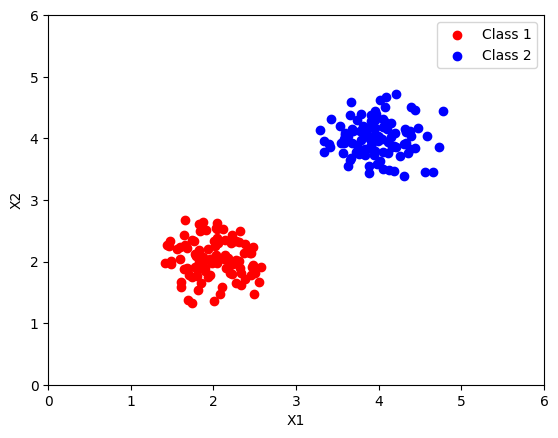

In [ ]:
# Criar os dados de duas distribuições Gaussianas (conforme a dica dada na documentação do exercício)
n1 = 100
n2 = 100
mean1 = [2, 2]
std1 = 0.3
mean2 = [4, 4]
std2 = 0.3

xc1 = np.random.normal(size=(n1, 2), scale=std1) + mean1
xc2 = np.random.normal(size=(n2, 2), scale=std2) + mean2

plt.scatter(xc1[:, 0], xc1[:, 1], color='red', label='Class 1')
plt.scatter(xc2[:, 0], xc2[:, 1], color='blue', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()

As the data will be generated for several possible scenarios (varying K and std), a practical way to do this is to create an array of values ​​for k and std and loop through these values ​​from a for.


In [ ]:
k_values = [2, 4, 8, 16, 32]
std_values = [0.3, 0.5, 0.7, 0.9]

Now that the k_values ​​and std_values ​​array have been defined, the last step is to use these values ​​to generate samples and evaluate how the KNN function can classify such samples in different scenarios.


<ipython-input-14-d504c328b83c>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


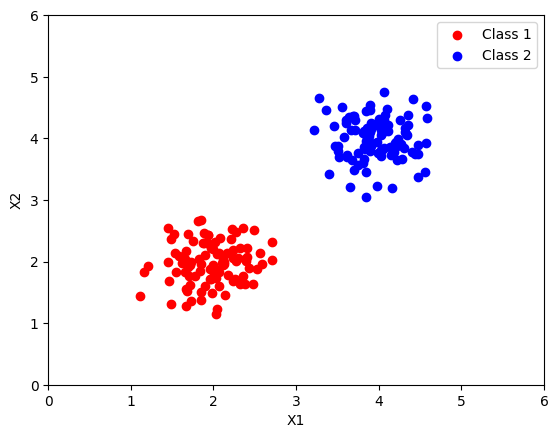

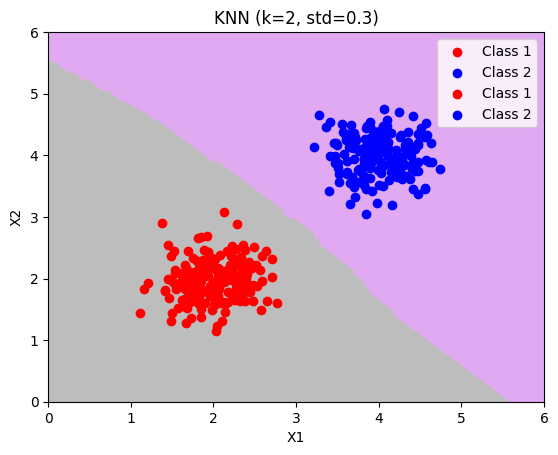

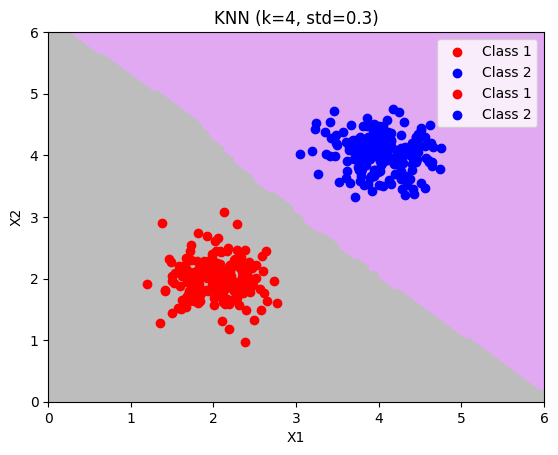

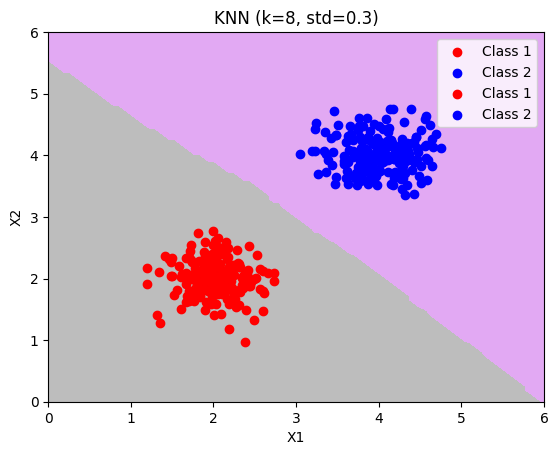

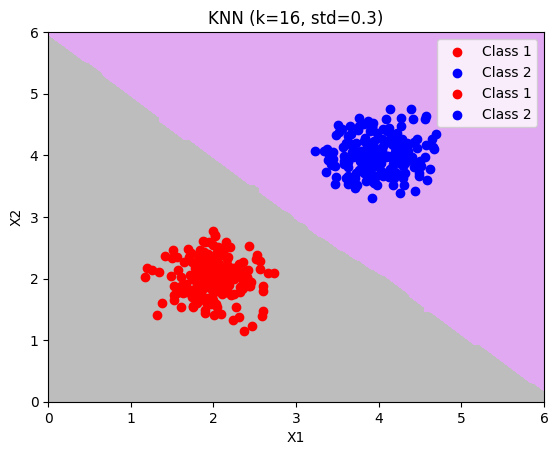

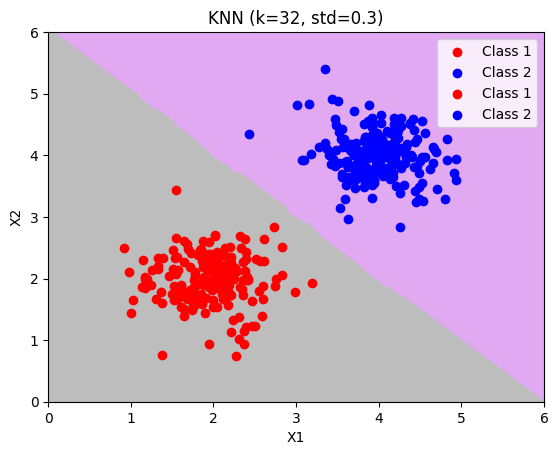

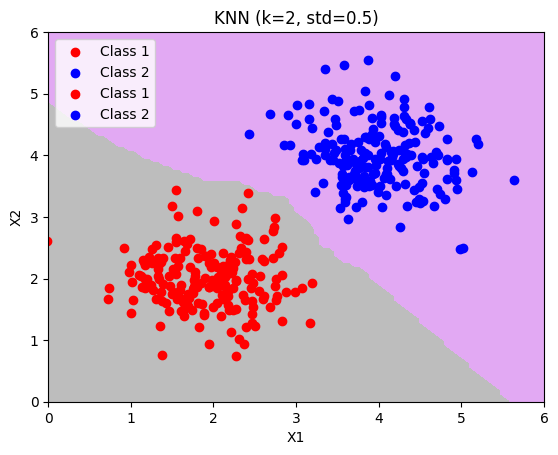

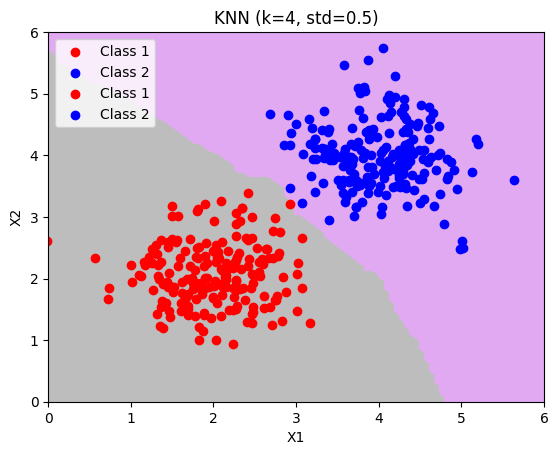

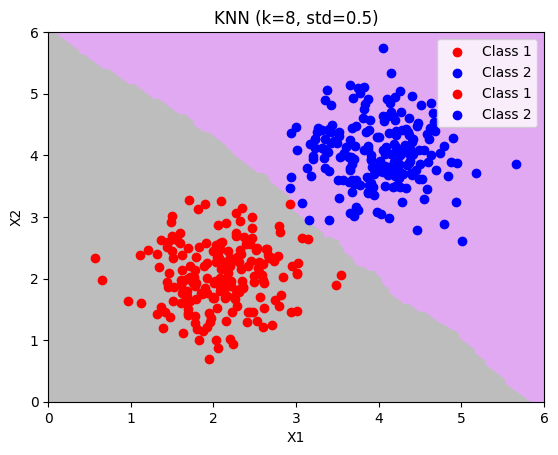

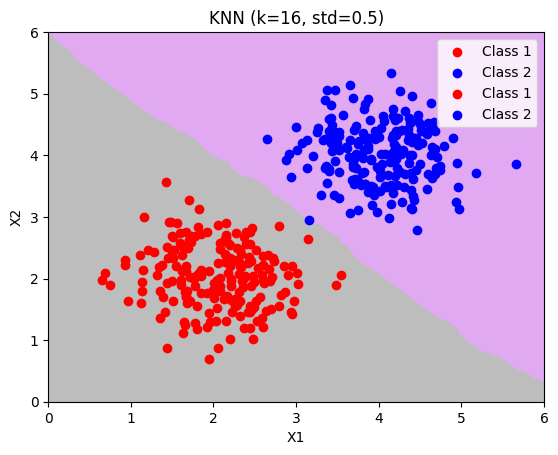

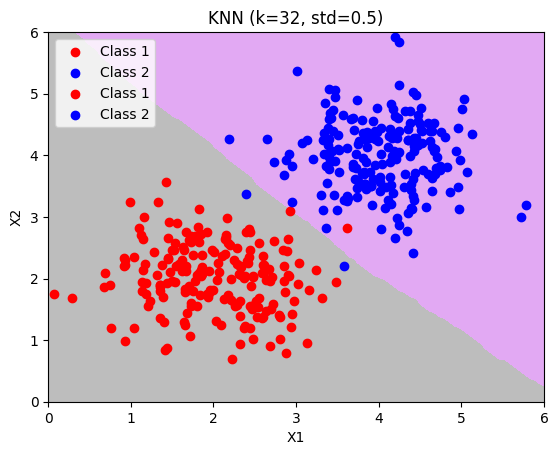

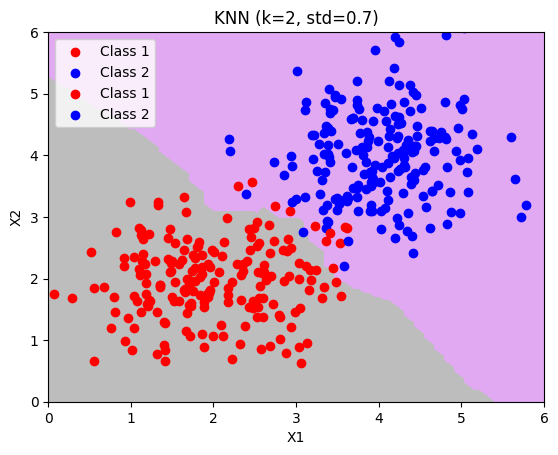

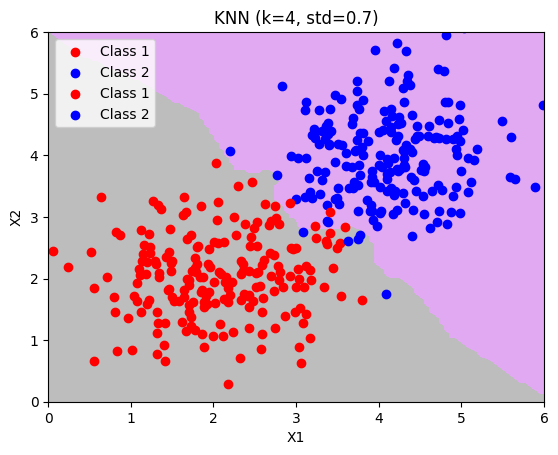

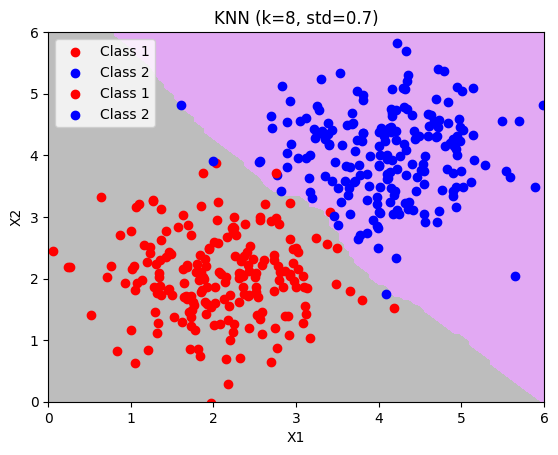

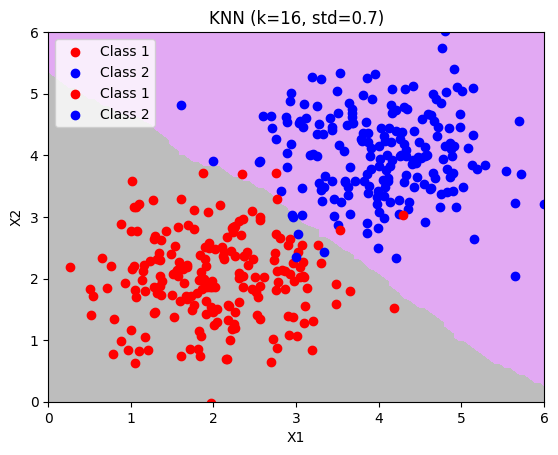

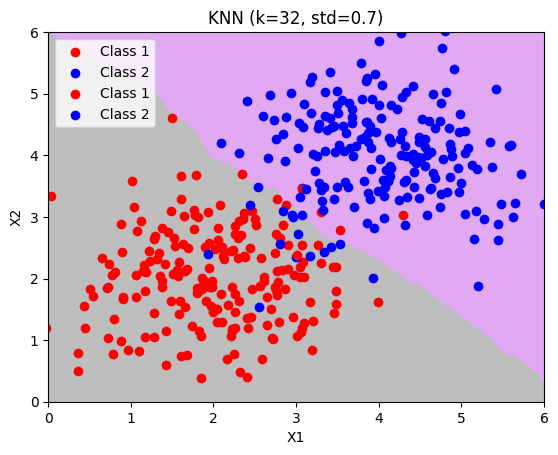

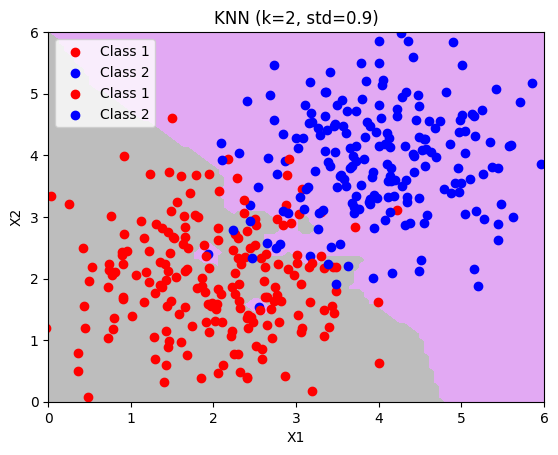

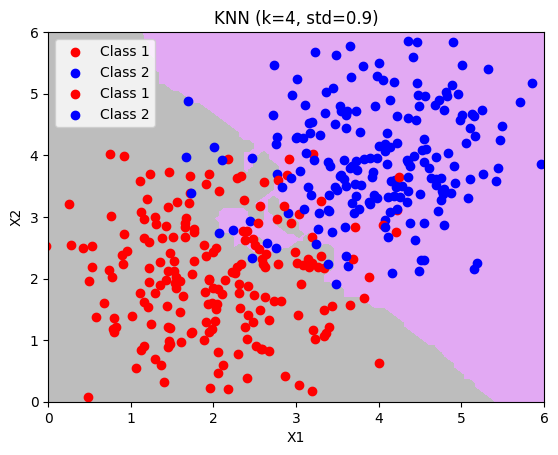

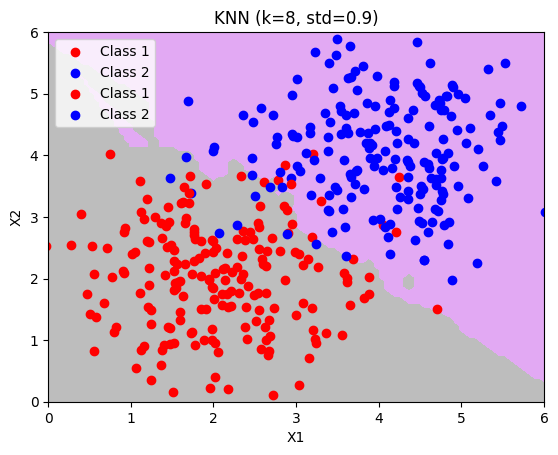

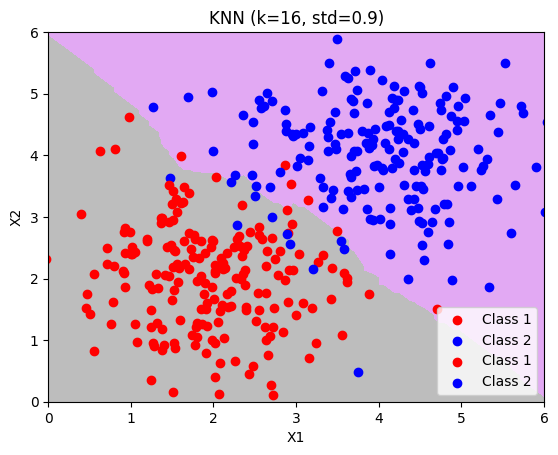

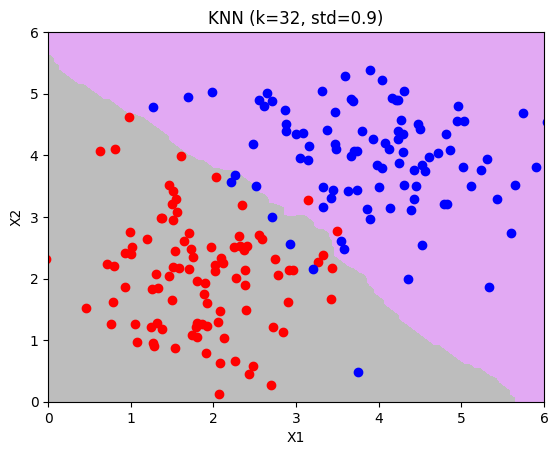

In [ ]:
for std in std_values:
    for k in k_values:
        n1 = 100
        n2 = 100
        mean1 = [2, 2]
        mean2 = [4, 4]

        xc1 = np.random.normal(size=(n1, 2), scale=std) + mean1
        xc2 = np.random.normal(size=(n2, 2), scale=std) + mean2

        plt.scatter(xc1[:, 0], xc1[:, 1], color='red', label='Class 1')
        plt.scatter(xc2[:, 0], xc2[:, 1], color='blue', label='Class 2')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.xlim(0, 6)
        plt.ylim(0, 6)
        plt.legend()

        x1_range = np.linspace(0, 6, 100)
        x2_range = np.linspace(0, 6, 100)
        X1, X2 = np.meshgrid(x1_range, x2_range)
        X_grid = np.c_[X1.ravel(), X2.ravel()]

        Y_grid = np.zeros(X_grid.shape[0])
        for i, xt in enumerate(X_grid):
            Y_grid[i] = ourKNN(xt, np.vstack((xc1, xc2)), np.hstack((np.ones(n1), -1*np.ones(n2))), k)

        Y_grid = Y_grid.reshape(X1.shape)

        plt.figure()
        plt.contourf(X1, X2, Y_grid, cmap=ListedColormap(['#E2A9F3', '#BDBDBD']), levels=[-1, 0, 1])
        plt.scatter(xc1[:, 0], xc1[:, 1], color='red', label='Class 1')
        plt.scatter(xc2[:, 0], xc2[:, 1], color='blue', label='Class 2')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.xlim(0, 6)
        plt.ylim(0, 6)
        plt.title(f'KNN (k={k}, std={std})')

plt.show()


As the value of std increases, the samples tend to spread out more, thus creating regions of conflict. In these scenarios, solutions with a higher K tend to be more effective because it is a more complex scenario and requires a more robust configuration, while small values ​​of K suffered underfitting. On the other hand, in scenarios that do not have this conflict region but the samples are about to meet, solutions with very high K tend to generate overfitting.
Therefore, it is possible to conclude that it is very important to know how to choose the correct values ​​as there is no ideal value that meets all cases, for example, high std's required high k's, but for intermediate values ​​of std, choosing a high k is not the best solution.
